In [59]:
import pandas as pd
import seaborn as sn
df = pd.read_csv("weight-height2.csv")
df


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
6,Male,68.785081
7,Male,500.000000
8,Male,550.000000


In [57]:
mean = df['Height'].mean()
std = df['Height'].std()
df['Z_Scores'] = (df['Height'] - mean) / std

df_no_outliers = df[df['Z_Scores'].abs() < 1]
print(df_no_outliers)


   Gender     Height  -0.486903  -0.512133  -0.485593  -0.497443  -0.506654  \
0    Male  73.847017  -0.486903  -0.512133  -0.485593  -0.497443  -0.506654   
1    Male  68.781904  -0.486903  -0.512133  -0.485593  -0.497443  -0.506654   
2    Male  74.110105  -0.486903  -0.512133  -0.485593  -0.497443  -0.506654   
3    Male  71.730978  -0.486903  -0.512133  -0.485593  -0.497443  -0.506654   
4    Male  69.881796  -0.486903  -0.512133  -0.485593  -0.497443  -0.506654   
5    Male  67.253016  -0.486903  -0.512133  -0.485593  -0.497443  -0.506654   
6    Male  68.785081  -0.486903  -0.512133  -0.485593  -0.497443  -0.506654   

   -0.519748  -0.512117   1.63577   1.884821   Z_Scores  
0  -0.519748  -0.512117   1.63577   1.884821  -0.486903  
1  -0.519748  -0.512117   1.63577   1.884821  -0.512133  
2  -0.519748  -0.512117   1.63577   1.884821  -0.485593  
3  -0.519748  -0.512117   1.63577   1.884821  -0.497443  
4  -0.519748  -0.512117   1.63577   1.884821  -0.506654  
5  -0.519748  -0.51

8

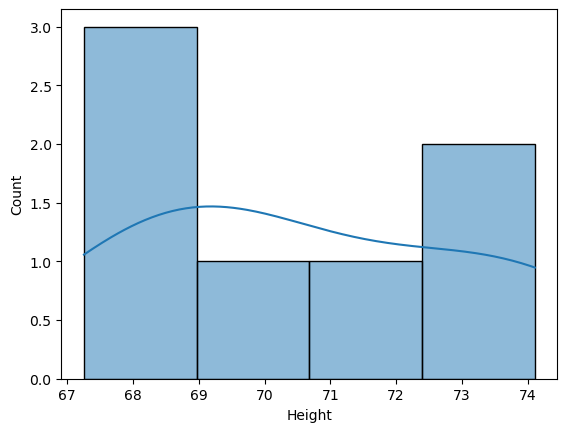

In [24]:
sn.histplot(df.Height, kde=True)




2.6600577700555434